In [1]:
# First make sure to install all required packages.
# You can do it by running the following command:

In [2]:
# ]add Arrow CSV DataFrames Plots FreqTables StatsBase

In [3]:
# If you launched Jupyter in directory with attached Project.toml and Manifest.toml
# use below command to install required packages with fixed versions. 
# Check Project introduction for more information.

In [4]:
#] instantiate

In [5]:
# Import required libraries
import Downloads
import SHA
using Arrow
using CSV
using DataFrames
using Plots
using FreqTables
using Statistics
using StatsBase

# Boston Housing

In [6]:
# Define URL to Boston Housing data and expected SHA1
const HOUSING_URL = "https://archive.ics.uci.edu/ml/" *
                    "machine-learning-databases/housing/housing.data"
const HOUSING_NAME = "housing.txt"
const HOUSING_SHA1 = [0xad, 0xfa, 0x6b, 0x6d, 0xca,
                      0x24, 0xa6, 0x3f, 0xe1, 0x66,
                      0xa9, 0xe7, 0xfa, 0x01, 0xce,
                      0xe4, 0x33, 0x58, 0x57, 0xd1];

In [7]:
# Download Boston Housing data if not exists
if isfile(HOUSING_NAME)
    @info "$HOUSING_NAME found. Skipping download."
else
    @info "$HOUSING_NAME not found. Fetching from source."
    Downloads.download(HOUSING_URL, HOUSING_NAME)
end

┌ Info: housing.txt not found. Fetching from source.
└ @ Main In[7]:5


"housing.txt"

In [8]:
# Check SHA1 of Boston Housing file
if HOUSING_SHA1 == open(SHA.sha1, HOUSING_NAME)
    @info "SHA1 check of $HOUSING_NAME passed."
else
    error("$HOUSING_NAME file has an invalid SHA1. Aborting!")
end

┌ Info: SHA1 check of housing.txt passed.
└ @ Main In[8]:3


In [9]:
# Read Boston Housing CSV
housing_ref = CSV.read(HOUSING_NAME, DataFrame,
                       header=[:CRIM, :ZN, :INDUS, :CHAS, :NOX, :RM, :AGE,
                               :DIS, :RAD, :TAX, :PTRATIO, :B, :LSTAT, :MEDV],
                       delim=' ', ignorerepeated=true, tasks=1)

# We make a copy as we will modify housing variable later
# However, we want to keep housing_ref untouched in case we make some error to avoid reloading it repeatedly
housing = copy(housing_ref)

┌ Warning: `tasks` keyword argument is deprecated; use `ntasks` instead
└ @ CSV /home/wolf/.julia/packages/CSV/owrEo/src/context.jl:274


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0


In [10]:
# Check basic statistics of all columns
describe(housing)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,CRIM,3.61352,0.00632,0.25651,88.9762,0,Float64
2,ZN,11.3636,0.0,0.0,100.0,0,Float64
3,INDUS,11.1368,0.46,9.69,27.74,0,Float64
4,CHAS,0.06917,0,0.0,1,0,Int64
5,NOX,0.554695,0.385,0.538,0.871,0,Float64
6,RM,6.28463,3.561,6.2085,8.78,0,Float64
7,AGE,68.5749,2.9,77.5,100.0,0,Float64
8,DIS,3.79504,1.1296,3.20745,12.1265,0,Float64
9,RAD,9.54941,1,5.0,24,0,Int64


In [11]:
# Find nominal variables (output of describe(housing) shows us that integer columns contin only a few values)
nominal = names(housing, Int)

2-element Vector{String}:
 "CHAS"
 "RAD"

In [12]:
# Find continuous variables
continuous = names(housing, Float64)

12-element Vector{String}:
 "CRIM"
 "ZN"
 "INDUS"
 "NOX"
 "RM"
 "AGE"
 "DIS"
 "TAX"
 "PTRATIO"
 "B"
 "LSTAT"
 "MEDV"

In [13]:
# Inspect distribution of nominal variables
foreach(name -> println("\n", proptable(housing, name)), nominal)


2-element Named Vector{Float64}
CHAS  │ 
──────┼────────
0     │ 0.93083
1     │ 0.06917

9-element Named Vector{Float64}
RAD  │ 
─────┼──────────
1    │ 0.0395257
2    │ 0.0474308
3    │ 0.0750988
4    │  0.217391
5    │  0.227273
6    │ 0.0513834
7    │ 0.0335968
8    │ 0.0474308
24   │   0.26087


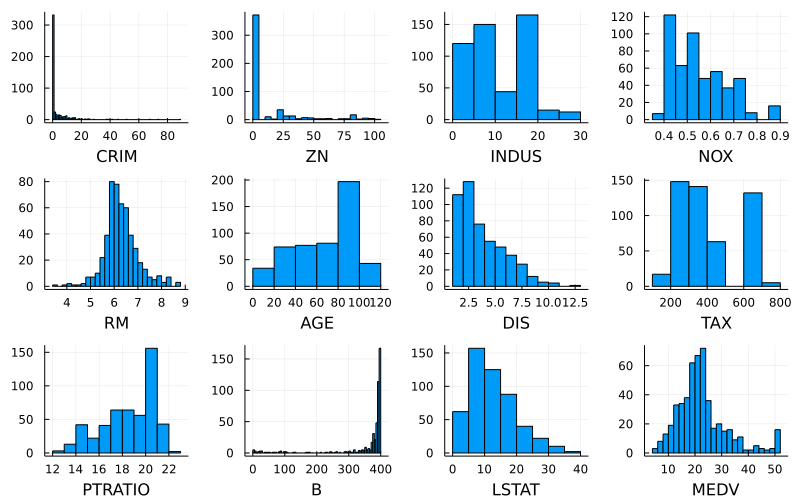

In [14]:
# Check distributions of numeric features

# First define a helper function for drawing of a single histogram
histogram_helper(column_name) =
    histogram(housing[!, column_name], xlabel=column_name, legend=false)

# Compose a grid of histograms in a single plot
plot(map(x -> histogram_helper(x), continuous)..., layout=grid(3, 4), size=(800,500))

In [15]:
# Check the frequency table of :MEDV variable
freqtable(housing, :MEDV)

229-element Named Vector{Int64}
MEDV  │ 
──────┼───
5.0   │  2
5.6   │  1
6.3   │  1
7.0   │  2
7.2   │  3
7.4   │  1
7.5   │  1
8.1   │  1
8.3   │  2
8.4   │  2
8.5   │  2
⋮        ⋮
43.5  │  1
43.8  │  1
44.0  │  1
44.8  │  1
45.4  │  1
46.0  │  1
46.7  │  1
48.3  │  1
48.5  │  1
48.8  │  1
50.0  │ 16

In [16]:
# Based on histogram plot, MEDV is censored or inaccurate on upper limit - 16 observations have value equal to 50.0
# In our project we decide to just remove these values

# Remove rows from housing in-place (! marks in-place operation)
# Note that 16 rows got removed
filter!(:MEDV => <(50.0), housing)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0


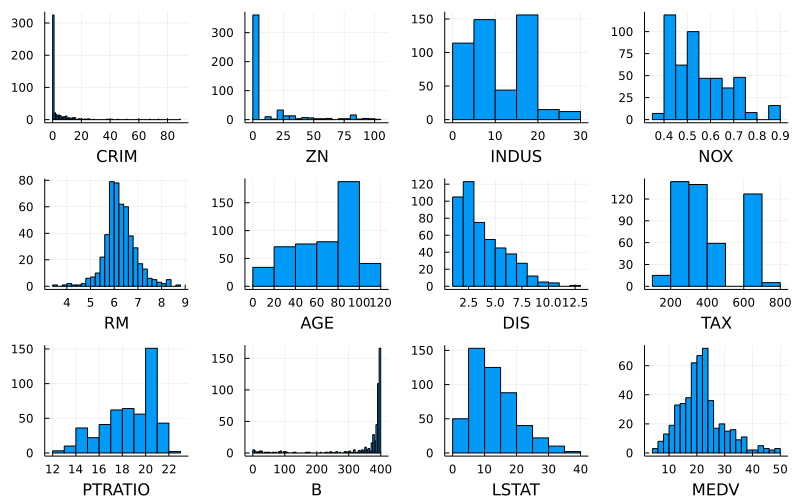

In [17]:
#Check variables distributions after filtering the observations
plot(map(x -> histogram_helper(x), continuous)..., layout=grid(3, 4), size=(800,500))

In [18]:
#Calculate Kendall's correlation
housing_cor = corkendall(Matrix(housing))

14×14 Matrix{Float64}:
  1.0        -0.458266    0.520867   …  -0.255792    0.483386    -0.438928
 -0.458266    1.0        -0.530466       0.121932   -0.399438     0.3565
  0.520867   -0.530466    1.0           -0.185451    0.493072    -0.448465
  0.0187153  -0.0364009   0.0570377     -0.026583    0.00639807   0.0700622
  0.594802   -0.514629    0.616625      -0.193448    0.479634    -0.428623
 -0.218774    0.279787   -0.299508   …   0.0382782  -0.455255     0.471074
  0.489837   -0.424882    0.483657      -0.145344    0.522331    -0.427413
 -0.5359      0.484681   -0.57237        0.157373   -0.452619     0.360628
  0.556161   -0.224992    0.350976      -0.206419    0.30502     -0.270892
  0.535601   -0.273946    0.474513      -0.237354    0.402941    -0.440709
  0.316977   -0.357918    0.341488   …  -0.0448801   0.32111     -0.396202
 -0.255792    0.121932   -0.185451       1.0        -0.163366     0.152093
  0.483386   -0.399438    0.493072      -0.163366    1.0         -0.658586
 -0

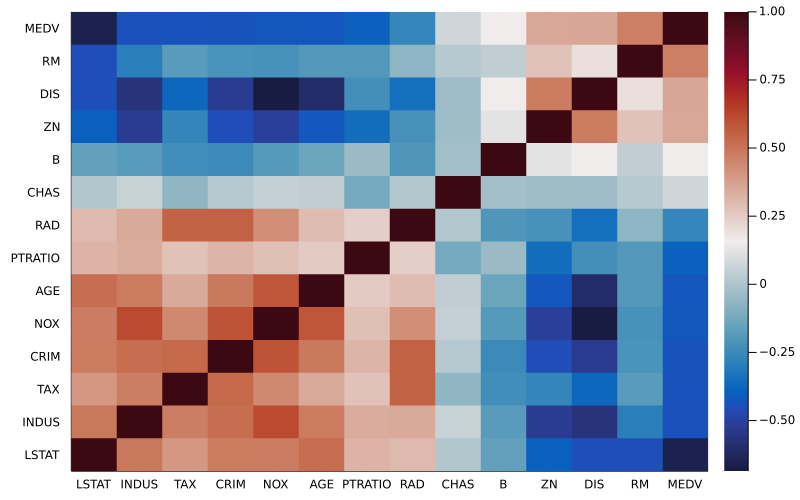

In [19]:
# Get the information how we should reorder rows of housing_cor
# Remember that MEDV is the last variable in our data set
ord = sortperm(housing_cor[:, end])

# Plot a heatmap, where both axis labels and correlation matrix are reordered by correlation with MEDV
heatmap(names(housing)[ord],
        names(housing)[ord],
        housing_cor[ord, ord],
        c=:balance,
        size=(800,500))

In [20]:
# Get information on absolute value of correlation
sort(DataFrame(variable = names(housing), cor=housing_cor[:, end]),
     :cor, by=abs)

,variable,cor
,String,Float64
1,CHAS,0.0700622
2,B,0.152093
3,RAD,-0.270892
4,ZN,0.3565
5,DIS,0.360628
6,PTRATIO,-0.396202
7,AGE,-0.427413
8,NOX,-0.428623
9,CRIM,-0.438928


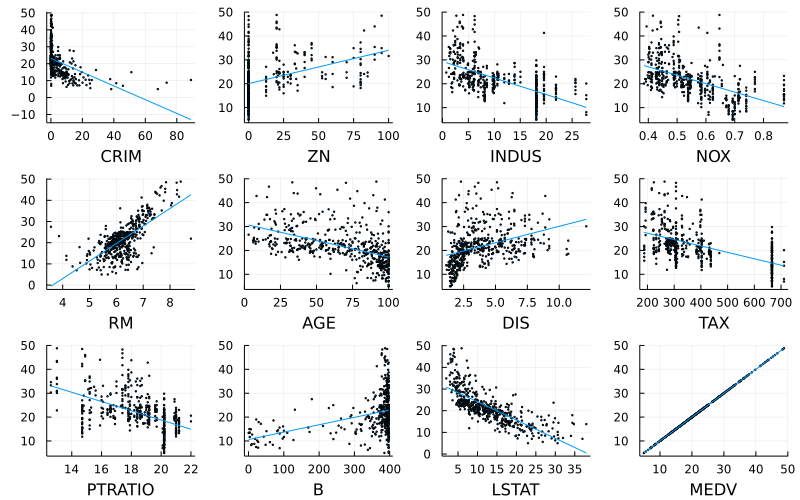

In [21]:
#Additionally check relation of continuous variables visually on scatterplots

scatter_helper(column_name) =
    scatter(housing[!, column_name], housing.MEDV, xlabel=column_name,
            legend=false, smooth=true, ms=1)

plot(map(x -> scatter_helper(x), continuous)..., layout=grid(3, 4), size=(800,500))

In [22]:
# Remove least correlated feature - B
# Again, we do an in-place operation
select!(housing, Not(:B))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0


In [23]:
# Transform CRIM and DIS - logarithmic transformation
# Also bin ZN variable
transform!(housing,
           :CRIM => ByRow(log), :DIS => ByRow(log), :ZN => ByRow(>(0)),
           renamecols=false)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
,Float64,Bool,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64
1,-5.06404,1,2.31,0,0.538,6.575,65.2,1.40854,1,296.0
2,-3.6005,0,7.07,0,0.469,6.421,78.9,1.60284,2,242.0
3,-3.60123,0,7.07,0,0.469,7.185,61.1,1.60284,2,242.0
4,-3.43052,0,2.18,0,0.458,6.998,45.8,1.80207,3,222.0
5,-2.67292,0,2.18,0,0.458,7.147,54.2,1.80207,3,222.0
6,-3.51157,0,2.18,0,0.458,6.43,58.7,1.80207,3,222.0
7,-2.42713,1,7.87,0,0.524,6.012,66.6,1.71569,5,311.0
8,-1.93413,1,7.87,0,0.524,6.172,96.1,1.78348,5,311.0
9,-1.55476,1,7.87,0,0.524,5.631,100.0,1.80535,5,311.0


In [24]:
# Recalculate the list of continuous variables
continuous = names(housing, Float64)

10-element Vector{String}:
 "CRIM"
 "INDUS"
 "NOX"
 "RM"
 "AGE"
 "DIS"
 "TAX"
 "PTRATIO"
 "LSTAT"
 "MEDV"

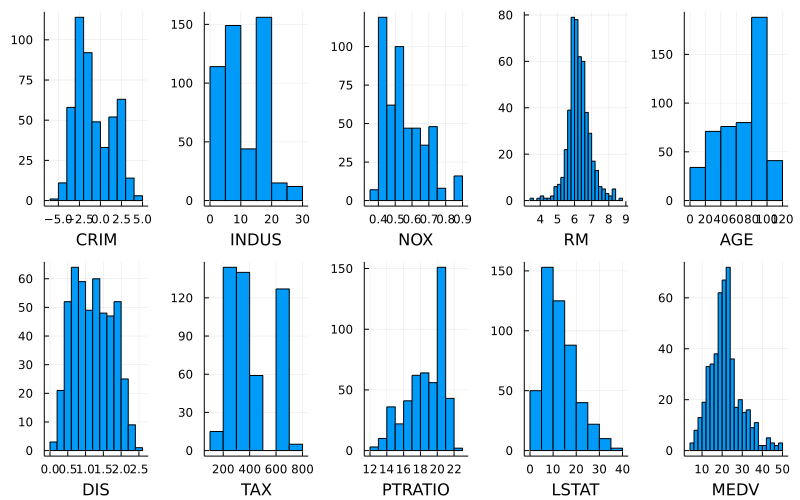

In [25]:
# Plot histogram again
# We see that now distributions of variables look better
plot(map(x -> histogram_helper(x), continuous)..., layout=grid(2, 5), size=(800,500))

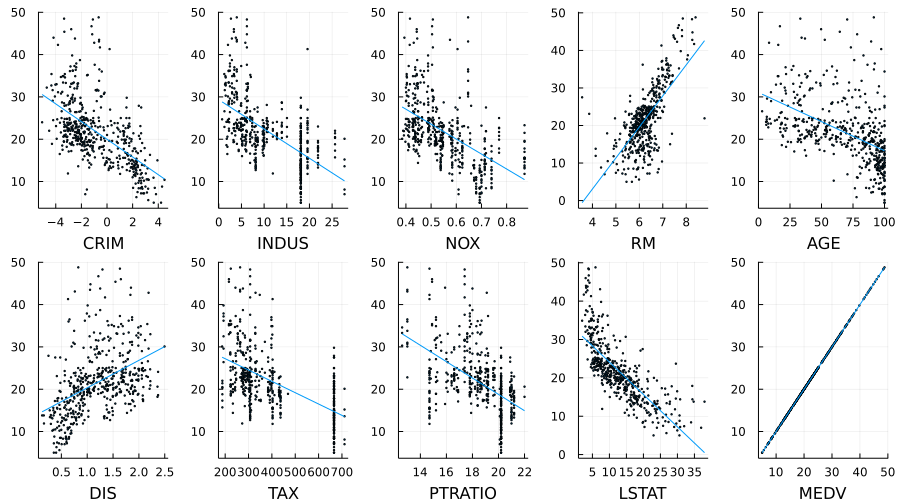

In [26]:
# Plot scatterplot again
plot(map(x -> scatter_helper(x), continuous)..., layout=grid(2, 5), size=(900,500))

In [27]:
# Declare auxilary function for calculating bootstrap 90% confidence interval
function gen_meanCI(x)
    boot = [mean(rand(x, length(x))) for _ in 1:10_000]
    return (mean=mean(x), q5=quantile(boot, 0.05), q95=quantile(boot, 0.95))
end

gen_meanCI (generic function with 1 method)

In [28]:
# Mean and 90% CI ends per group for :CHAS variable
mean_chas = combine(groupby(housing, :CHAS, sort=true), :MEDV => gen_meanCI => AsTable)

,CHAS,mean,q5,q95
,Int64,Float64,Float64,Float64
1,0,21.4885,20.882,22.0874
2,1,23.9793,21.9552,26.1312


In [29]:
# Mean and 90% CI ends per group for :RAD variable
mean_rad = combine(groupby(housing, :RAD, sort=true), :MEDV => gen_meanCI => AsTable)

,RAD,mean,q5,q95
,Int64,Float64,Float64,Float64
1,1,23.0158,21.0103,24.9895
2,2,26.8333,24.304,29.4917
3,3,27.3324,25.3242,29.3596
4,4,20.8574,19.9685,21.7898
5,5,24.3697,23.2091,25.5781
6,6,20.9769,20.2538,21.7
7,7,27.1059,24.6529,29.6882
8,8,29.5043,26.5783,32.6043
9,24,15.0811,14.2992,15.8575


In [30]:
# Mean and 90% CI ends per group for :ZN variable
mean_zn = combine(groupby(housing, :ZN, sort=true), :MEDV => gen_meanCI => AsTable)

,ZN,mean,q5,q95
,Bool,Float64,Float64,Float64
1,0,19.5737,18.9817,20.1745
2,1,27.407,26.3619,28.4798


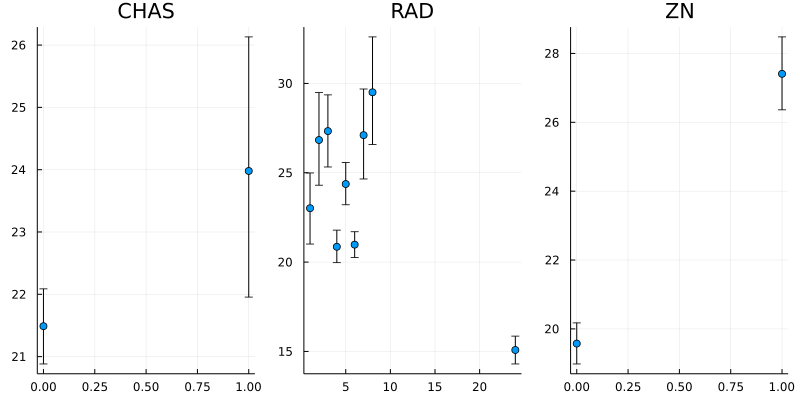

In [31]:
# Plot the data frames in a single plot
# You could use @df macro from StatsPlots.jl package to save you some typing here
plot(plot(mean_chas.CHAS, mean_chas.mean,
          yerror=(mean_chas.mean - mean_chas.q5, mean_chas.q95 - mean_chas.mean),
          label=nothing, title="CHAS", seriestype=:scatter),
     plot(mean_rad.RAD, mean_rad.mean,
          yerror=(mean_rad.mean - mean_rad.q5, mean_rad.q95 - mean_rad.mean),
          label=nothing, title="RAD", seriestype=:scatter),
     plot(mean_zn.ZN, mean_zn.mean,
          yerror=(mean_zn.mean - mean_zn.q5, mean_zn.q95 - mean_zn.mean),
          label=nothing, title="ZN", seriestype=:scatter),
    layout=grid(1, 3), size = (800,400))

In [32]:
# Remove variable RAD as we do not see its interpretable relationship with :MEDV target variable
select!(housing, Not(:RAD))

# Have a look at the data after cleaning
describe(housing)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,CRIM,-0.795081,-5.06404,-1.39635,4.48837,0,Float64
2,ZN,0.263265,0,0.0,1,0,Bool
3,INDUS,11.1131,0.74,9.69,27.74,0,Float64
4,CHAS,0.0591837,0,0.0,1,0,Int64
5,NOX,0.554307,0.385,0.538,0.871,0,Float64
6,RM,6.24547,3.561,6.185,8.78,0,Float64
7,AGE,68.279,2.9,76.8,100.0,0,Float64
8,DIS,1.20077,0.128393,1.18659,2.49539,0,Float64
9,TAX,408.002,187.0,330.0,711.0,0,Float64


In [33]:
# Save clean dataset as Arrow file
Arrow.write("housing.arrow", housing)

"housing.arrow"